In [2]:
import numpy as np 
import pandas as pd



In [3]:
df=pd.read_excel('Folds5x2_pp.xlsx')

df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [5]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1:]

print(X.head())
print(y.head())

      AT      V       AP     RH
0  14.96  41.76  1024.07  73.17
1  25.18  62.96  1020.04  59.08
2   5.11  39.40  1012.16  92.14
3  20.86  57.32  1010.24  76.64
4  10.82  37.50  1009.23  96.62
       PE
0  463.26
1  444.37
2  488.56
3  446.48
4  473.90


In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=0)

X_val,X_test,y_val,y_test =train_test_split(X_test,y_test,test_size=0.5)


In [7]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

models_list=[svm.SVR(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),KNeighborsRegressor()]
print('r2                   rmse                     mae ')
for model in models_list:

    model.fit(X_train,y_train)

    y_pred=model.predict(X_test)


    r2=r2_score(y_test,y_pred)
    mse=np.sqrt(mean_squared_error(y_test,y_pred))
    mae=mean_absolute_error(y_test,y_pred)

    
    print(r2 , mse , mae )



    

r2                   rmse                     mae 
0.3632405098565896 13.665691565239122 11.444002564653584
0.9646504028766778 3.2198536733231955 2.3764507107023403
0.9524640042578175 3.7338356597098823 2.892658701675613
0.8947706088847469 5.55536284710306 4.38987143856218
0.948116338231649 3.900849644392942 2.9300392976588645


PyTorch ANN 

In [89]:

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Initialize Datasaet 

X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

class RegressionDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = RegressionDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
val_dataset = RegressionDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float())
test_dataset = RegressionDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())


# Constants 
EPOCHS = 40
BATCH_SIZE =64
LEARNING_RATE = 0.001
NUM_FEATURES = len(X.columns)



# Initialize Dataloader 
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)



## NN Architecture 

class MultipleRegression(nn.Module):
    def __init__(self, num_features):

        super(MultipleRegression, self).__init__()
        
        self.layer_1 = nn.Linear(num_features,4)
        self.layer_2=nn.Linear(4,4)
        self.layer_out = nn.Linear(4, 1)
        
        
        self.relu = nn.ReLU()


    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x=self.layer_2(x)
        x=self.layer_2(x)
        x=self.layer_2(x)
        x=self.layer_2(x)
        x=self.layer_2(x)
        x=self.layer_2(x)
        x=self.layer_2(x)
        
        x = self.layer_out(x)
        return (x)


    def predict(self, test_inputs):
        x = self.relu(self.layer_1(test_inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
        return (x)






In [90]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


In [91]:
# Initialize model , optimizer and loss function 

model = MultipleRegression(NUM_FEATURES)
model.to(device)
print(model)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

MultipleRegression(
  (layer_1): Linear(in_features=4, out_features=4, bias=True)
  (layer_2): Linear(in_features=4, out_features=4, bias=True)
  (layer_out): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU()
)


In [92]:
loss_stats = {
    'train': [],
    "val": []
}


print("Begin training.")

for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch.unsqueeze(1))
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch.unsqueeze(1))
            
            val_epoch_loss += val_loss.item()
            
            
            loss_stats['train'].append(train_epoch_loss/len(train_loader))

            
            loss_stats['val'].append(val_epoch_loss/len(val_loader))                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')

Begin training.


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 190394.23610 | Val Loss: 99861.55963
Epoch 002: | Train Loss: 9867.71455 | Val Loss: 346.03513
Epoch 003: | Train Loss: 322.77363 | Val Loss: 348.48368
Epoch 004: | Train Loss: 323.81456 | Val Loss: 349.18312
Epoch 005: | Train Loss: 323.06302 | Val Loss: 345.77783
Epoch 006: | Train Loss: 321.72952 | Val Loss: 344.86112
Epoch 007: | Train Loss: 322.64382 | Val Loss: 345.58808
Epoch 008: | Train Loss: 322.40547 | Val Loss: 343.96017
Epoch 009: | Train Loss: 320.91536 | Val Loss: 349.66573
Epoch 010: | Train Loss: 318.48612 | Val Loss: 343.09836
Epoch 011: | Train Loss: 317.35606 | Val Loss: 346.25118
Epoch 012: | Train Loss: 318.54180 | Val Loss: 343.08558
Epoch 013: | Train Loss: 316.67536 | Val Loss: 341.86197
Epoch 014: | Train Loss: 316.24787 | Val Loss: 346.45680
Epoch 015: | Train Loss: 313.81145 | Val Loss: 343.18116
Epoch 016: | Train Loss: 314.41818 | Val Loss: 344.32625
Epoch 017: | Train Loss: 313.33674 | Val Loss: 345.15809
Epoch 018: | Train Loss: 

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

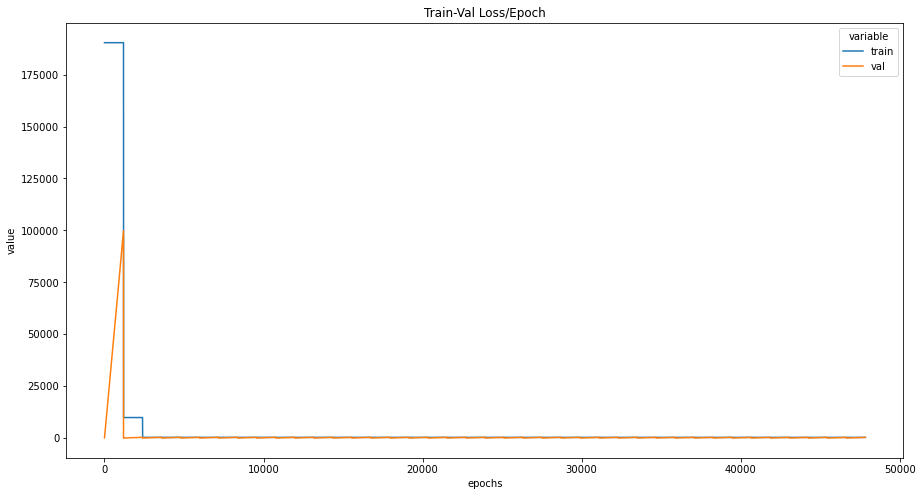

In [93]:
import seaborn as sns

train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})


plt.figure(figsize=(15,8))

sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')

In [94]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_pred_list.append(y_test_pred.cpu().numpy())
        # print(y_pred_list)

    
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]




rmse = np.sqrt(mean_squared_error(y_test, y_pred_list))
r_square = r2_score(y_test, y_pred_list)
print("Root Mean Squared Error :",rmse)
print("R^2 :",r_square)

Root Mean Squared Error : 17.193030290381376
R^2 : -0.04590893843509969
